In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [5]:
start = '2010-01-01'
end = '2024-04-29'
itc = yf.Ticker("ITC.NS")
print(itc.info)

{'address1': 'Virginia House', 'address2': '37 Jawaharlal Nehru Road', 'city': 'Kolkata', 'zip': '700071', 'country': 'India', 'phone': '91 33 2288 9371', 'fax': '91 33 2288 0655', 'website': 'https://www.itcportal.com', 'industry': 'Tobacco', 'industryKey': 'tobacco', 'industryDisp': 'Tobacco', 'sector': 'Consumer Defensive', 'sectorKey': 'consumer-defensive', 'sectorDisp': 'Consumer Defensive', 'longBusinessSummary': 'ITC Limited engages in the fast-moving consumer goods, hotels, paperboards and paper and packaging, agri, and information technology businesses in India and internationally. It primarily offers cigarettes and cigars; staples, spices, biscuits, confectionery and gums, snacks, noodles and pasta, beverages, dairy, ready to eat meals, chocolate, coffee, and frozen foods; personal care products; notebooks, pens and pencils, geometry boxes, erasers, sharpeners, rulers, wax and plastic crayons, sketch pens, and oil pastels; safety matches; and incense sticks under various bran

In [6]:
df = (itc.history(period="max"))
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,3.236300,3.265456,3.226581,3.255737,985500,0.0,0.0
1996-01-02 00:00:00+05:30,3.187705,3.246017,3.084040,3.132633,7470000,0.0,0.0
1996-01-03 00:00:00+05:30,2.993334,3.063955,2.974544,3.032208,15160500,0.0,0.0
1996-01-04 00:00:00+05:30,3.032208,3.109309,2.999813,3.089224,12397500,0.0,0.0
1996-01-05 00:00:00+05:30,3.089224,3.077562,3.025729,3.033504,5008500,0.0,0.0


In [7]:
df = df.reset_index()['Close']

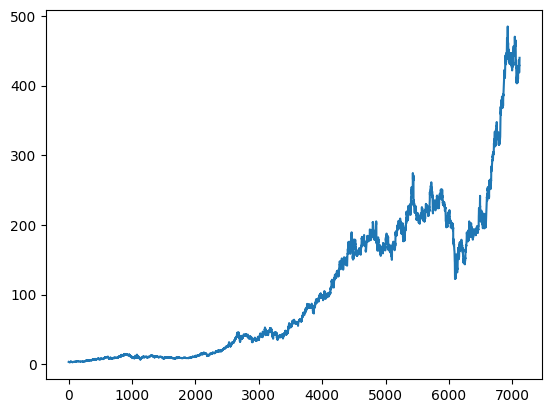

In [8]:
import matplotlib.pyplot as plt
plt.plot(df)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [16]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [19]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [27]:
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape)

(4472, 150)


In [29]:
print(y_train.shape)

(4472,)


In [30]:
print(X_test.shape), print(ytest.shape)

(2339, 150)
(2339,)


(None, None)

In [31]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
70/70 [==============================] - 9s 36ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 2/100
70/70 [==============================] - 2s 29ms/step - loss: 3.1954e-05 - val_loss: 0.0023
Epoch 3/100
70/70 [==============================] - 1s 21ms/step - loss: 3.2157e-05 - val_loss: 0.0022
Epoch 4/100
70/70 [==============================] - 1s 20ms/step - loss: 3.4283e-05 - val_loss: 0.0021
Epoch 5/100
70/70 [==============================] - 1s 20ms/step - loss: 3.2459e-05 - val_loss: 0.0024
Epoch 6/100
70/70 [==============================] - 1s 20ms/step - loss: 3.2018e-05 - val_loss: 0.0022
Epoch 7/100
70/70 [==============================] - 1s 20ms/step - loss: 3.3327e-05 - val_loss: 0.0025
Epoch 8/100
70/70 [==============================] - 1s 20ms/step - loss: 3.1707e-05 - val_loss: 0.0021
Epoch 9/100
70/70 [==============================] - 1s 20ms/step - loss: 3.3312e-05 - val_loss: 0.0015
Epoch 10/100
70/70 [==============================] - 2s 27ms/step -

In [36]:
import tensorflow as tf

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

74/74 [==============================] - 1s 7ms/step


In [38]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [39]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

62.39838063587155

In [40]:
math.sqrt(mean_squared_error(ytest,test_predict))

243.3491195720441

In [46]:
len(df)

7113

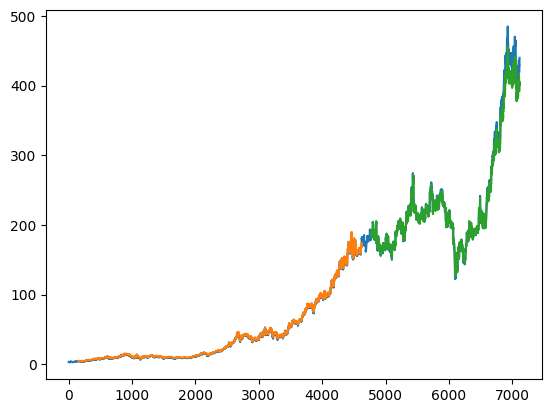

In [41]:
look_back=150
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_predict)

2339

In [42]:
model.save('LSTM_150.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
